<a href="https://colab.research.google.com/github/Basilisa1008/Pytorch-Beginner/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Bulding basic Neural Network !***



In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:

# Create a Model class that inherits nn.Module
class Model(nn.Module):
    def __init__(self, in_features=4, h1=9, h2=8, out_features=3):
        super(Model, self).__init__()  # Initialize the nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Use torch.relu instead of F.relu
        x = torch.relu(self.fc2(x))
        x = self.out(x)
        return x




In [4]:
model = Model()

In [5]:
print(model)

Model(
  (fc1): Linear(in_features=4, out_features=9, bias=True)
  (fc2): Linear(in_features=9, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)


In [6]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
import pandas as pd


url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data_1 = pd.read_csv(url)

In [9]:
data_1.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
# Change the variety column from str to numbers
data_1['variety'] = data_1['variety'].replace('Setosa' , 0.0)
data_1['variety'] = data_1['variety'].replace('Versicolor',1.0)
data_1['variety'] = data_1['variety'].replace('Virginica',2.0)

data_1

<ipython-input-10-67f834c247f7>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_1['variety'] = data_1['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
# Train test split !  set X,y
X = data_1.drop('variety', axis=1)
y = data_1['variety']

In [12]:
# Since X and y are inform of data frame they need to be converted into numpy arrays
X = X.values
y = y.values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Traun Test Split
X_train , X_test , y_train , y_test = train_test_split (X, y , test_size= 0.2, random_state = 41)

In [15]:
# Convert the X features which are in numpy array form into tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [16]:
print(X_train.shape)

torch.Size([120, 4])


In [17]:
print(X_train.dtype)

torch.float32


In [18]:
with torch.no_grad():  # Disable gradient tracking for testing
    output = model(X_train)
    print(output.shape)  # Expected: torch.Size([120, 3])


torch.Size([120, 3])


In [19]:
# Covert thr y labels which are in numpy array form into tensors
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [20]:
print(y_train.dtype)

torch.float32


In [21]:
# Convert the y-labels to tensor long
y_train = y_train.long()
y_test = y_test.long()

In [22]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss ()

#Choose Adam Optimizer, learning rate = lr (if the error doesn't go down after a bunch of iterations (epochs), we have to lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)

In [23]:
import torch.optim as optim

In [24]:
# Train the model

# 1. Determine how many epochs ( epochs = one run through all the data in the neural network)
epochs = 200
losses = []   # just a python list and it will be appended

for i in range(epochs):
  # go foward and get the prediction
  y_pred = model(X_train)  # get the predicted results


  # measure the loss/error , on the first try is going to be high
  loss = criterion(y_pred, y_train)     # predicted values vs the train values


  # keeping tracks of the losses
  losses.append(loss.detach().numpy())

  # print out every 10 epochs , just to see if it is working
  if i % 10 == 0 :
    print(f'Epoch: {i} and loss {loss}' )

  # to perform backpropagation this done by taking the error rate of the forward
  # propagation and feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()





Epoch: 0 and loss 1.0943336486816406
Epoch: 10 and loss 0.8807231783866882
Epoch: 20 and loss 0.617257833480835
Epoch: 30 and loss 0.4187200963497162
Epoch: 40 and loss 0.26960489153862
Epoch: 50 and loss 0.1502200812101364
Epoch: 60 and loss 0.08558590710163116
Epoch: 70 and loss 0.05715177580714226
Epoch: 80 and loss 0.044051580131053925
Epoch: 90 and loss 0.037024855613708496
Epoch: 100 and loss 0.032578349113464355
Epoch: 110 and loss 0.029391203075647354
Epoch: 120 and loss 0.026920530945062637
Epoch: 130 and loss 0.024915192276239395
Epoch: 140 and loss 0.02341064065694809
Epoch: 150 and loss 0.021996548399329185
Epoch: 160 and loss 0.020665045827627182
Epoch: 170 and loss 0.01964806392788887
Epoch: 180 and loss 0.018677208572626114
Epoch: 190 and loss 0.017808709293603897


Text(0.5, 0, 'Epochs')

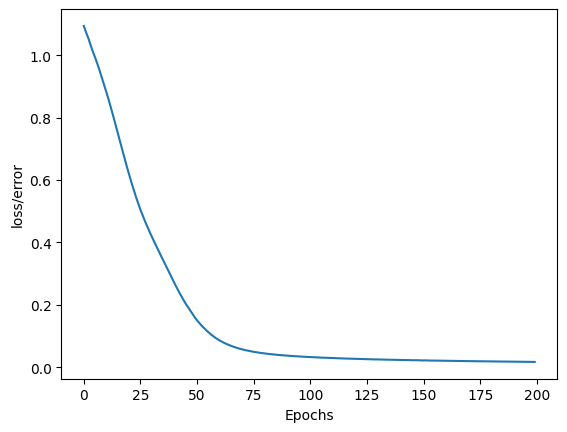

In [25]:
# graph it put !
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epochs')

In [26]:
# Evaluate the model based on the test data set
with torch.no_grad():       # it turns off the backpropagation
  y_eval = model(X_test)    # y-eval is the prediction and the X_test are the features from the test data set
  loss = criterion(y_eval, y_test)    # finding the error between y_eval and y_test

In [27]:
loss

tensor(0.1616)

In [28]:
# see the network performance on the test data vs on the training data

correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model(data)

    # Will tells us  what the network thinks the flower is in which class
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()} ')


    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct !')

1.) tensor([-7.2869,  3.5542,  7.7287]) 	 2 	 2 
2.) tensor([-10.7758,   0.9176,  14.7831]) 	 2 	 2 
3.) tensor([-11.7678,   1.6190,  15.4893]) 	 2 	 2 
4.) tensor([-3.3124,  7.4623, -1.1279]) 	 1 	 1 
5.) tensor([-9.5173,  2.6142, 11.5711]) 	 2 	 2 
6.) tensor([-1.0115,  8.3570, -5.0391]) 	 1 	 1 
7.) tensor([-7.0242,  4.2369,  6.7633]) 	 2 	 2 
8.) tensor([-3.1787,  7.4991, -1.3448]) 	 1 	 1 
9.) tensor([-8.2329,  3.4380,  9.1055]) 	 2 	 2 
10.) tensor([-11.5330,   0.8076,  15.9016]) 	 2 	 2 
11.) tensor([-6.5187,  4.5638,  5.7926]) 	 2 	 2 
12.) tensor([ 14.8399,   6.8579, -21.8240]) 	 0 	 0 
13.) tensor([ 13.3645,   6.2051, -19.6025]) 	 0 	 0 
14.) tensor([ 1.2949,  7.4311, -7.0138]) 	 1 	 1 
15.) tensor([ 13.3858,   7.1717, -20.5620]) 	 0 	 0 
16.) tensor([-5.8889,  5.4113,  4.1886]) 	 2 	 1 
17.) tensor([ 13.5790,   6.6639, -20.3111]) 	 0 	 0 
18.) tensor([-6.9822,  3.9856,  6.9350]) 	 1 	 2 
19.) tensor([ 15.1249,   6.6260, -21.8308]) 	 0 	 0 
20.) tensor([ 12.1981,   6.3725, -1

In [29]:
# Evaluating new data on the network
new_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

Remember: The results are in numbers known as ***logits*** meaning :***they are raw scores that the network calculates for each class (0, 1, 2).***

In [30]:
# Introduce the new data for training
with torch.no_grad():
  print(model(new_iris))

tensor([ 13.5203,   7.8375, -21.2995])


***Logits*** are not probabilities hence they can be converted into probability using the ***softmax function*** .

What ***softmax*** do : It squashes the ***logits*** into values between ***0*** and ***1***, making them easier to interpret as probabilities.

In [31]:
# Apply softmax to convert logits to probabilities
probs = F.softmax(model(new_iris), dim=0)

print(probs)

tensor([9.9661e-01, 3.3924e-03, 7.5248e-16], grad_fn=<SoftmaxBackward0>)


In [32]:
print([round(float(p), 4) for p in probs])

[0.9966, 0.0034, 0.0]


***To get the predicted class*** directly ***without probabilities***, you can use the ***argmax function***, which  the infindsdex of the largest score:

In [33]:
predicted_class = torch.argmax(model(new_iris))
print(predicted_class.item())

0


The ***state dictionary*** is a Python dictionary containing all the model's parameters (like weights and biases) and their values after training.

- These parameters are what the model learns during training and are essential for making predictions.

Also: ***torch.save(..., 'model.pth')***
- This saves the state dictionary to a file called ***'model.pth'***. The file extension ***.pth***  is commonly used for saving PyTorch models, but you can name it whatever you want.

In [34]:
# Save and Load the NN model
torch.save(model.state_dict(), 'iris_model.pth')


In [35]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pth'))

<ipython-input-35-41a5a8e5789d>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pth'))


<All keys matched successfully>

In [37]:
# Making sure it was loaded
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=9, bias=True)
  (fc2): Linear(in_features=9, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)

In [38]:
# From now on you have to use new_model instead of model
with torch.no_grad():
  print(new_model(new_iris))

tensor([ 13.5203,   7.8375, -21.2995])
